In [1]:
### - import all the usual stuff - ###

import sys
sys.path.append('../../mist-base/GW')
sys.path.append('../../mist-base/')
sys.path.append('../../mist-base/utils')
sys.path.append('../../')

from src.utils.comb import Comb3
import gw150814_simulator as gs
from gw150814_simulator import GW150814, defaults, GW150814_Additive
# import module

import torch
torch.set_float32_matmul_precision('medium')
import numpy as np
import scipy
from scipy.signal import welch
from scipy.ndimage import uniform_filter1d
import scipy.stats
import pytorch_lightning as pl
from collections import defaultdict
from tqdm import tqdm
import jax.numpy as jnp
import plotfancy as pf
pf.housestyle_rcparams()

from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries

from ipywidgets import interactive_output, VBox, HBox, FloatSlider, Checkbox, FloatLogSlider, FloatRangeSlider, FloatText, IntSlider
import sounddevice as sd

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import os, sys

from simulators.additive import Simulator_Additive
from simulators.utils import *
from utils.data import OnTheFlyDataModule, StoredDataModule
from utils.module import CustomLossModule_withBounds, BCELossModule

In [ ]:
n_samples = 10000
white_noise = np.random.uniform(low=-1.0, high=1.0, size=n_samples)
white_noise_td = np.linspace(0,2,n_samples)

def plot_comb(f0,df,nf,aps):

    test = Comb3(white_noise,white_noise_td, inject=False, ampscale=aps)
    test.inject_comb_known(white_noise,white_noise_td,f0,df,nf)

    fig2, ax2 = pf.create_plot(size=(4,2))
    ax2.plot(test.w_FD_freqs,test.w_FD_data, color='#77aca2')

    ax3 = fig2.add_axes((0,-1,1,1), sharex=ax2)
    ax3.plot(test.w_FD_freqs, test.i_FD_data, color='#ff004f')
    ax3.plot(test.w_FD_freqs, test.w_FD_data, color='#77aca2')

    ax3.set_xlabel('Frequency')
    ax3.set_ylabel('Fourier Coeff')
    ax3.yaxis.set_label_coords(-0.15,1)


    ax4 = fig2.add_axes((1.3,-1,1,1))
    ax4.set_xlabel('Time')
    ax4.set_ylabel('Strain\n(Comb Only)')

    ax4.plot(test.w_TD_times,test.i_TD_data_comb, color='#ff004f')

    ax5 = fig2.add_axes((1.3,0,1,1), sharex=ax4)
    plt.setp(ax5.get_xticklabels(), visible=False)
    ax5.plot(test.w_TD_times,test.i_TD_data, color='#5C2751')
    ax5.set_ylabel('Strain\n(Comb+Signal)')

    pf.fix_plot([ax2,ax3,ax4,ax5])
    plt.show()



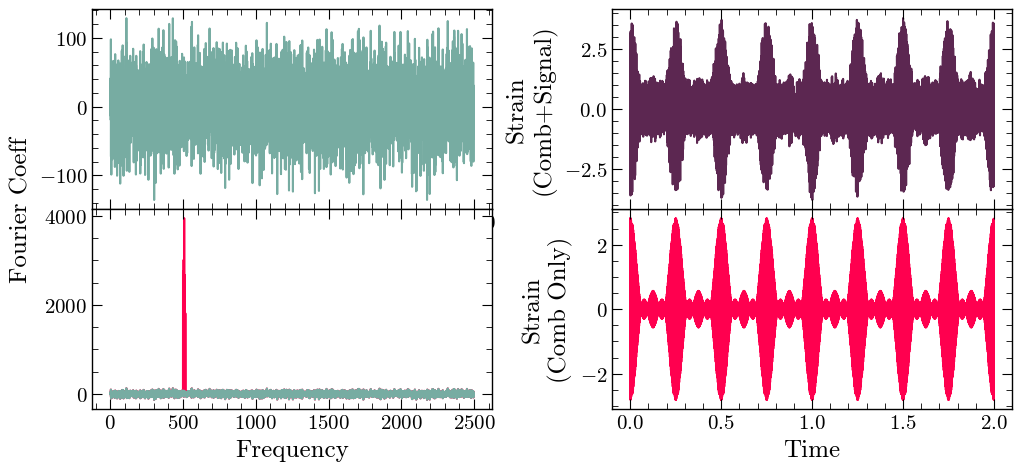